In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, glob, json

In [156]:
# transfert all optimals files to data directory
# os.system("cp ../Visualisor/RoadMap_Visualisor/optimals/* data/")

In [157]:
def getCurveClass(curvename: str, mode: str = "courbure"):
    if mode == "courbure":
        path = "curves_courbure/" + curvename + ".json"
        f = open(path, "r")
        data = json.load(f)
        return data["class"]
    if mode == "angle_dist":
        path = "curves_angle_dist/" + curvename + ".json"
        f = open(path, "r")
        data = json.load(f)
        return data["class"]

### Classification avec courbure

In [158]:
df = pd.DataFrame()
path = "data/"
pattern = os.path.join(path, "*.json")
file_list = glob.glob(pattern)
for f in file_list:
    data = pd.read_json(f, lines=True)
    data["class"] = getCurveClass(f.split("/")[1].split("_")[0], mode="courbure")
    df = df.append(data, ignore_index=True)

In [159]:
# speed distribution
stats = df["optimal_speed"].describe()
stats

count    123.000000
mean       1.807371
std        2.294775
min        0.000000
25%        0.915500
50%        1.183000
75%        1.505500
max        9.994000
Name: optimal_speed, dtype: float64

In [160]:
# speed distribution by classes
df.groupby("class").describe()

optimal_speed                                                          \
              count      mean       std       min      25%     50%      75%   
class                                                                         
0              18.0  0.511680  0.219835  0.000000  0.43400  0.6125  0.66125   
1              32.0  0.973243  0.155103  0.688284  0.85325  1.0040  1.08075   
2              32.0  1.223269  0.205917  0.728000  1.13975  1.1885  1.33475   
3              17.0  1.512294  0.219987  1.184000  1.39100  1.4940  1.64900   
4              14.0  1.703000  0.234418  1.272000  1.50875  1.8090  1.83100   
5              10.0  9.325700  0.930621  6.992000  9.12925  9.5320  9.98675   

                 
            max  
class            
0      0.765234  
1      1.329000  
2      1.652000  
3      2.042000  
4      2.015000  
5      9.994000

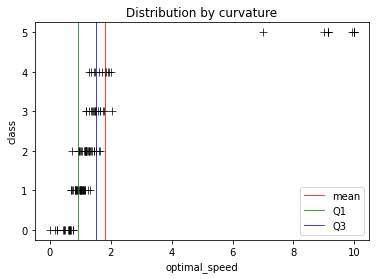

In [161]:
# Draw speed repartition of each classe's optimal speed
sns.scatterplot(data=df, x="optimal_speed", y="class", color="k", marker="+", s=80)
plt.axvline(x=stats["mean"], color="r", label="mean", linewidth=.75)
plt.axvline(x=stats["25%"], color="g", label="Q1", linewidth=.75)
plt.axvline(x=stats["75%"], color="b", label="Q3", linewidth=.75)
plt.yticks(range(0, 6))
plt.title("Distribution by curvature")
plt.legend()
plt.savefig("curvature.svg")
plt.show()

In [162]:
df.loc[df["class"] == 5].sort_values(by="optimal_speed")

,optimal_speed,name,class
56,6.992,132.json,5
79,8.989,140.json,5
17,9.129,087.json,5
32,9.130,089.json,5
111,9.134,093.json,5
85,9.930,138.json,5
64,9.977,176.json,5
43,9.990,091.json,5
11,9.992,134.json,5
44,9.994,136.json,5


### Classification avec angle + distance

In [163]:
df_ = pd.DataFrame()
path = "data/"
pattern = os.path.join(path, "*.json")
file_list = glob.glob(pattern)
for f in file_list:
    data = pd.read_json(f, lines=True)
    data["class"] = getCurveClass(f.split("/")[1].split("_")[0], mode="angle_dist")
    df_ = df_.append(data, ignore_index=True)

In [164]:
# speed distribution
df_["optimal_speed"].describe()

count    123.000000
mean       1.807371
std        2.294775
min        0.000000
25%        0.915500
50%        1.183000
75%        1.505500
max        9.994000
Name: optimal_speed, dtype: float64

In [165]:
# speed distribution by classes
df_.groupby("class").describe()


optimal_speed                                                           
              count      mean       std    min      25%      50%    75%    max
class                                                                         
0               5.0  0.525400  0.432933  0.176  0.22800  0.23000  0.933  1.060
1              18.0  0.912772  0.450197  0.000  0.66550  0.85645  1.121  2.042
2              30.0  1.035241  0.281455  0.424  0.90250  1.04300  1.157  1.768
3              64.0  2.164336  2.517848  0.464  1.13975  1.39000  1.670  9.994
4               5.0  4.908200  4.640792  1.272  1.34300  1.95900  9.977  9.990
5               1.0  9.134000       NaN  9.134  9.13400  9.13400  9.134  9.134

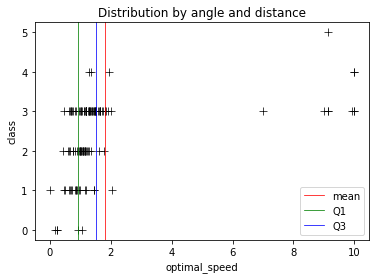

In [166]:
# Draw speed repartition of each classe's optimal speed
sns.scatterplot(data=df_, x="optimal_speed", y="class", color="k", marker="+", s=80)
plt.axvline(x=stats["mean"], color="r", label="mean", linewidth=.75)
plt.axvline(x=stats["25%"], color="g", label="Q1", linewidth=.75)
plt.axvline(x=stats["75%"], color="b", label="Q3", linewidth=.75)
plt.yticks(range(0, 6))
plt.title("Distribution by angle and distance")
plt.legend()
plt.savefig("angle_dist.svg")
plt.show()

In [169]:
df_.loc[df_['class'] == 3].sort_values(by="optimal_speed")

,optimal_speed,name,class
33,0.464000,122.json,3
96,0.646000,115.json,3
67,0.665000,022.json,3
36,0.685000,113.json,3
23,0.688284,007.json,3
...,...,...,...
17,9.129000,087.json,3
32,9.130000,089.json,3
85,9.930000,138.json,3
11,9.992000,134.json,3
